In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
0,772016845,Costa Rica,15436.0,2021,2994.980,122.0,23.671,950252.0,605099.0,345153.0,NaN,18767.0,18.44,11.74,6.70,NaN,3641.0,9488.0,0.184,140.0
1,537953416,Dominican Republic,3991.0,2021,358.972,61.0,5.487,105000.0,105000.0,NaN,NaN,11806.0,0.94,0.94,NaN,NaN,1062.0,11806.0,0.106,73.0
2,363835805,Brazil,456899.0,2022,2131.792,4187.0,19.536,392925626.0,177836868.0,155071690.0,65073212.0,814209.0,183.33,82.97,72.35,30.36,3799.0,173043.0,0.081,3212.0
3,677248247,Lesotho,17.0,2022,7.451,0.0,0.000,NaN,NaN,NaN,NaN,1796.0,NaN,NaN,NaN,NaN,787.0,1399.0,0.061,0.0
4,493133731,Panama,5591.0,2020,1284.913,110.0,25.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Id                                   100000 non-null  int64  
 1   Location                             100000 non-null  object 
 2   Weekly Cases                         99839 non-null   float64
 3   Year                                 100000 non-null  int64  
 4   Weekly Cases per Million             99326 non-null   float64
 5   Weekly Deaths                        99031 non-null   float64
 6   Weekly Deaths per Million            98521 non-null   float64
 7   Total Vaccinations                   31094 non-null   float64
 8   People Vaccinated                    29683 non-null   float64
 9   People Fully Vaccinated              28275 non-null   float64
 10  Total Boosters                       15345 non-null   float64
 11  Daily Vaccinat

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29156 entries, 0 to 29155
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Id                                   29156 non-null  int64  
 1   Location                             29156 non-null  object 
 2   Weekly Cases                         29104 non-null  float64
 3   Year                                 29156 non-null  int64  
 4   Weekly Cases per Million             28962 non-null  float64
 5   Weekly Deaths                        28867 non-null  float64
 6   Weekly Deaths per Million            28726 non-null  float64
 7   Total Vaccinations                   9176 non-null   float64
 8   People Vaccinated                    8746 non-null   float64
 9   People Fully Vaccinated              8299 non-null   float64
 10  Total Boosters                       4502 non-null   float64
 11  Daily Vaccinations          

In [5]:
train.describe()

,Id,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
count,1.000000e+05,9.983900e+04,100000.000000,99326.000000,99031.000000,98521.000000,3.109400e+04,2.968300e+04,2.827500e+04,1.534500e+04,6.016700e+04,31094.000000,29683.000000,28275.000000,15345.000000,60167.000000,5.981100e+04,59811.000000,100000.000000
mean,5.498989e+08,9.537037e+04,2020.913470,1390.731805,1066.632327,10.873557,2.417049e+08,1.158163e+08,9.730606e+07,4.299429e+07,4.657258e+05,90.101576,43.561892,38.562498,20.376100,2707.791713,1.787224e+05,0.114499,1059.594620
std,2.600604e+08,6.412934e+05,0.740532,4051.279310,5253.394546,24.733300,1.019570e+09,4.874872e+08,4.249924e+08,1.823154e+08,2.533276e+06,74.369035,30.122431,29.251783,22.625515,3531.546282,1.030482e+06,0.208469,5223.343449
min,1.000006e+08,0.000000e+00,2020.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,3.248550e+08,1.030000e+02,2020.000000,18.164000,1.000000,0.047000,9.881428e+05,5.796595e+05,4.667610e+05,4.022000e+04,1.056000e+03,18.870000,12.810000,8.485000,0.340000,401.000000,3.220000e+02,0.012000,1.000000
50%,5.490971e+08,1.084000e+03,2021.000000,189.165000,13.000000,1.709000,7.783314e+06,4.292557e+06,3.830587e+06,1.428285e+06,9.081000e+03,79.490000,46.460000,38.740000,10.110000,1496.000000,3.254000e+03,0.046000,13.000000
75%,7.753635e+08,9.806000e+03,2021.000000,1056.702000,128.000000,10.911000,4.966000e+07,2.525234e+07,2.161116e+07,1.129111e+07,6.374000e+04,146.997500,70.770000,64.950000,37.360000,3840.000000,2.298800e+04,0.140000,126.000000
max,9.999957e+08,2.406618e+07,2022.000000,104220.239000,103568.000000,1010.101000,1.211660e+10,5.254721e+09,4.815392e+09,2.126612e+09,4.332766e+07,366.020000,128.770000,126.720000,125.850000,117862.000000,2.058434e+07,11.786000,102123.000000


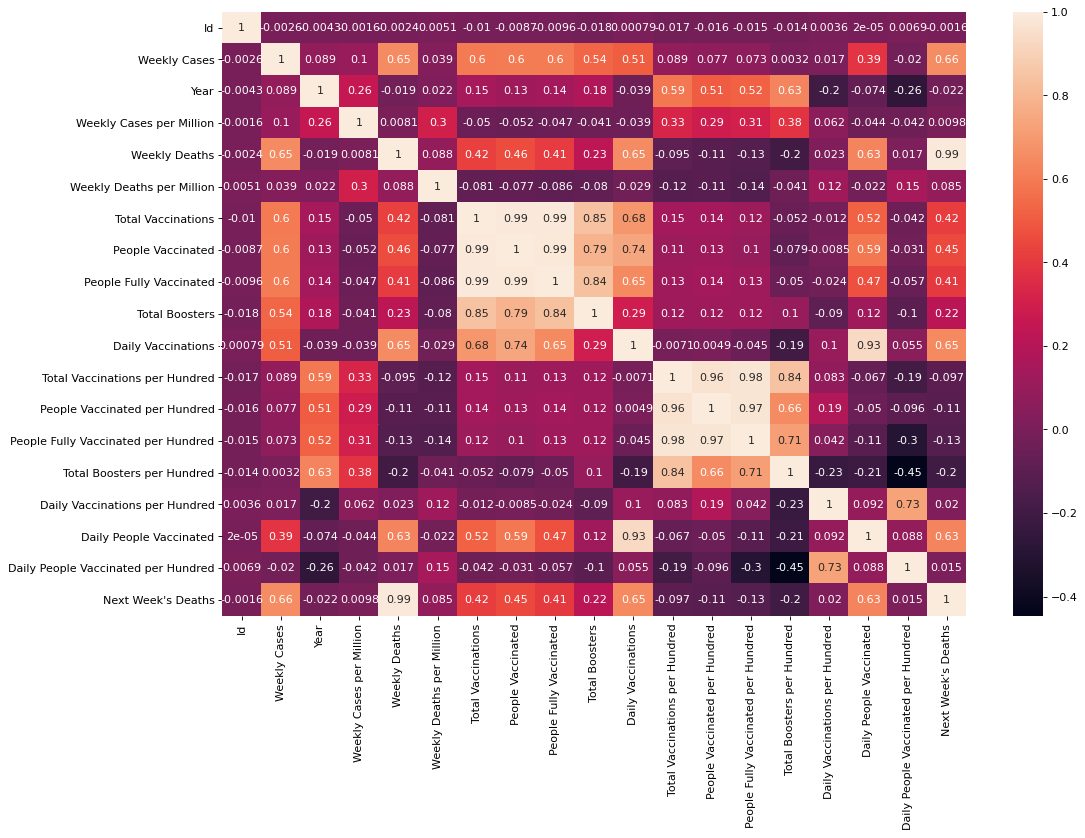

In [6]:
corr_mat = train.corr()
plt.figure(figsize=(15,10), dpi=80)
sns.heatmap(corr_mat,annot=True)
plt.show()

In [7]:
train_loc=list(set(train['Location']))
train_copy=train.copy()

#for loc in train_loc:
#    train_copy[train_copy["Location"]==loc]=(train_copy[train_copy["Location"]==loc].fillna(train_copy[train_copy["Location"]==loc].mean(numeric_only=True)))
train_copy=train_copy.fillna(0)

In [8]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Id                                   100000 non-null  int64  
 1   Location                             100000 non-null  object 
 2   Weekly Cases                         100000 non-null  float64
 3   Year                                 100000 non-null  int64  
 4   Weekly Cases per Million             100000 non-null  float64
 5   Weekly Deaths                        100000 non-null  float64
 6   Weekly Deaths per Million            100000 non-null  float64
 7   Total Vaccinations                   100000 non-null  float64
 8   People Vaccinated                    100000 non-null  float64
 9   People Fully Vaccinated              100000 non-null  float64
 10  Total Boosters                       100000 non-null  float64
 11  Daily Vaccinat

In [9]:
train_copy["Year"]=train_copy["Year"].map({2020:0,2021:1,2022:2})

In [10]:
train_copy.head()

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
0,772016845,Costa Rica,15436.0,1,2994.980,122.0,23.671,950252.0,605099.0,345153.0,0.0,18767.0,18.44,11.74,6.70,0.00,3641.0,9488.0,0.184,140.0
1,537953416,Dominican Republic,3991.0,1,358.972,61.0,5.487,105000.0,105000.0,0.0,0.0,11806.0,0.94,0.94,0.00,0.00,1062.0,11806.0,0.106,73.0
2,363835805,Brazil,456899.0,2,2131.792,4187.0,19.536,392925626.0,177836868.0,155071690.0,65073212.0,814209.0,183.33,82.97,72.35,30.36,3799.0,173043.0,0.081,3212.0
3,677248247,Lesotho,17.0,2,7.451,0.0,0.000,0.0,0.0,0.0,0.0,1796.0,0.00,0.00,0.00,0.00,787.0,1399.0,0.061,0.0
4,493133731,Panama,5591.0,0,1284.913,110.0,25.280,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,99.0


In [11]:
train_copy=train_copy.drop(["Id","Location"],axis=1)

In [12]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Weekly Cases                         100000 non-null  float64
 1   Year                                 100000 non-null  int64  
 2   Weekly Cases per Million             100000 non-null  float64
 3   Weekly Deaths                        100000 non-null  float64
 4   Weekly Deaths per Million            100000 non-null  float64
 5   Total Vaccinations                   100000 non-null  float64
 6   People Vaccinated                    100000 non-null  float64
 7   People Fully Vaccinated              100000 non-null  float64
 8   Total Boosters                       100000 non-null  float64
 9   Daily Vaccinations                   100000 non-null  float64
 10  Total Vaccinations per Hundred       100000 non-null  float64
 11  People Vaccina

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X=train_copy.drop(["Next Week's Deaths"],axis=1)
X = scaler.fit_transform(X)
Y=train_copy["Next Week's Deaths"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=33)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf=RandomForestRegressor(n_estimators=500, max_features='sqrt',min_samples_leaf=1,oob_score=True)
rf.fit(X_train,Y_train)
pred=rf.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, pred)))

RMSE:  301.78236321575486


In [15]:
# Loop for the best number
errors = [mean_squared_error(Y_test, preds) for preds in rf.staged_predict(X_test)]
# Optimal number of estimators
optimal_num_estimators = np.argmin(errors) + 1

AttributeError: 'RandomForestRegressor' object has no attribute 'staged_predict'

In [ ]:
#Plot
g=sns.lineplot(x=range(500), y=errors)
g.set_title(f'Best number of estimators at {optimal_num_estimators}', size=15);

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

GBoost = GradientBoostingRegressor(n_estimators=50000, learning_rate=0.08,
                                   max_depth=6, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X,Y)
#pred=GBoost.predict(X_test)
#print('RMSE: ', np.sqrt(mean_squared_error(Y_test, pred)))



GradientBoostingRegressor(learning_rate=0.08, loss='huber', max_depth=6,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=50000,
                          random_state=5)

In [35]:
# Loop for the best number
#errors = [mean_squared_error(Y_test, preds) for preds in GBoost.staged_predict(X_test)]
# Optimal number of estimators
#optimal_num_estimators = np.argmin(errors) + 1

In [36]:
#Plot
#g=sns.lineplot(x=range(10000), y=errors)
#g.set_title(f'Best number of estimators at {optimal_num_estimators}', size=15);

In [37]:
test_loc=list(set(test['Location']))
test_copy=test.copy()

#for loc in test_loc:
#    test_copy[test_copy["Location"]==loc]=(test_copy[test_copy["Location"]==loc].fillna(test_copy[test_copy["Location"]==loc].mean(numeric_only=True)))
test_copy=test_copy.fillna(0)

In [38]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29156 entries, 0 to 29155
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Id                                   29156 non-null  int64  
 1   Location                             29156 non-null  object 
 2   Weekly Cases                         29156 non-null  float64
 3   Year                                 29156 non-null  int64  
 4   Weekly Cases per Million             29156 non-null  float64
 5   Weekly Deaths                        29156 non-null  float64
 6   Weekly Deaths per Million            29156 non-null  float64
 7   Total Vaccinations                   29156 non-null  float64
 8   People Vaccinated                    29156 non-null  float64
 9   People Fully Vaccinated              29156 non-null  float64
 10  Total Boosters                       29156 non-null  float64
 11  Daily Vaccinations          

In [39]:
from sklearn.preprocessing import StandardScaler

test_copy=test_copy.drop(["Id","Location"],axis=1)
scaler = StandardScaler()
test_copy = scaler.fit_transform(test_copy)

ans=GBoost.predict(test_copy)
ans

array([492.13891956, 203.28556472,  34.853981  , ...,  15.25812659,
        16.83954974,  12.96733132])

In [40]:
sub = pd.DataFrame()
sub['Id'] = test["Id"]
sub["Next Week's Deaths"] = ans
sub.to_csv('submission.csv',index=False)

In [32]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression()

In [62]:
from sklearn.metrics import mean_squared_error
pred=regr.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, pred)))

RMSE:  590.5770274527422


In [63]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [64]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [65]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.005, random_state=1))

In [66]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [67]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [83]:
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [69]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [70]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [71]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12273447863.760683, tolerance: 172387959.9300789
  positive)
c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12335244349.628456, tolerance: 174324950.6198529
  positive)
c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12351439558.65455, tolerance: 176508996.885971
  positive)
c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.p


Lasso score: 624.2532 (8.5847)



c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12506655731.42116, tolerance: 176951088.6643094
  positive)


In [72]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12273429411.179155, tolerance: 172387959.9300789
  positive)
c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12335229082.084366, tolerance: 174324950.6198529
  positive)
c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12351443375.6265, tolerance: 176508996.885971
  positive)
c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

ElasticNet score: 624.2532 (8.5847)



c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12506650925.241167, tolerance: 176951088.6643094
  positive)


In [73]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: nan (nan)



c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "c:\Users\Simon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "c:\Users\Simon\AppData\Local\Programs\Pytho

In [84]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 480.5059 (28.9482)



In [85]:
from sklearn.utils import check_array
GBoost.fit(X_train,Y_train)


GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=1000,
                          random_state=5)

In [86]:
pred=GBoost.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, pred)))

RMSE:  448.6611076621278
